<a href="https://colab.research.google.com/github/ashwithaila3007/Intern_Task2/blob/main/ashwitha_ila.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Cell 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cell 2: Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Display basic information
print(customers.head())
print(products.head())
print(transactions.head())


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [2]:
# Cell 3: Overview of datasets
print(customers.info())
print(products.info())
print(transactions.info())

# Cell 4: Check for missing values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

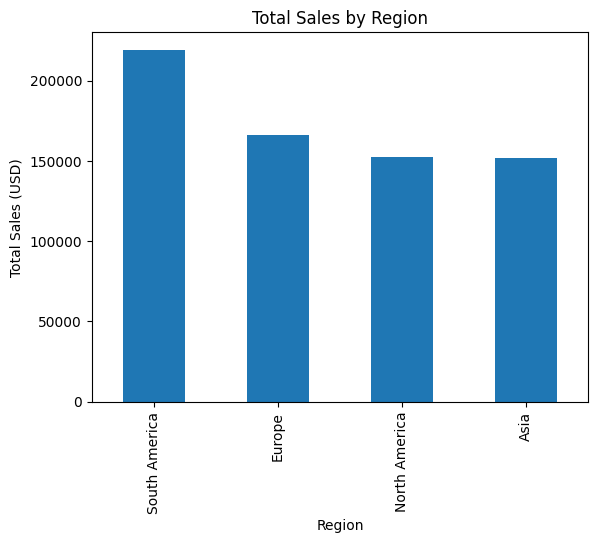

In [3]:
# Merge datasets
merged = pd.merge(transactions, customers, on='CustomerID')
merged = pd.merge(merged, products, on='ProductID')

# Visualization example: Total sales by region
region_sales = merged.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
region_sales.plot(kind='bar', title='Total Sales by Region', ylabel='Total Sales (USD)')
plt.show()


In [4]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

# Create customer profiles
customer_profiles = transactions.groupby('CustomerID').agg({'TotalValue': 'sum', 'Quantity': 'sum'}).reset_index()
scaler = StandardScaler()
customer_profiles_scaled = scaler.fit_transform(customer_profiles.iloc[:, 1:])


In [5]:
# Calculate similarities
similarities = cosine_similarity(customer_profiles_scaled)
similarity_df = pd.DataFrame(similarities, index=customer_profiles['CustomerID'], columns=customer_profiles['CustomerID'])

# Recommend top 3 lookalikes
lookalike_results = {}
for customer_id in similarity_df.index[:20]:
    similar_customers = similarity_df[customer_id].sort_values(ascending=False)[1:4]
    lookalike_results[customer_id] = list(zip(similar_customers.index, similar_customers.values))

# Save the results
lookalike_df = pd.DataFrame(lookalike_results).transpose()
lookalike_df.to_csv('FirstName_LastName_Lookalike.csv', index=True)


In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

# Prepare data
segmentation_data = transactions.groupby('CustomerID').agg({'TotalValue': 'sum', 'Quantity': 'sum'}).reset_index()
segmentation_data_scaled = scaler.fit_transform(segmentation_data.iloc[:, 1:])

# Apply clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(segmentation_data_scaled)
segmentation_data['Cluster'] = clusters


Davies-Bouldin Index: 0.776661054409607


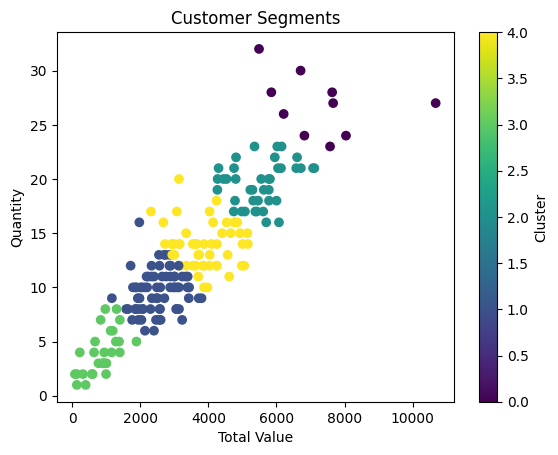

In [7]:
# Davies-Bouldin Index
db_index = davies_bouldin_score(segmentation_data_scaled, clusters)
print(f'Davies-Bouldin Index: {db_index}')

# Visualization
plt.scatter(segmentation_data['TotalValue'], segmentation_data['Quantity'], c=segmentation_data['Cluster'], cmap='viridis')
plt.title('Customer Segments')
plt.xlabel('Total Value')
plt.ylabel('Quantity')
plt.colorbar(label='Cluster')
plt.show()


In [13]:
# Save the segmentation results
segmentation_data.to_csv('FirstName_LastName_Clustering.csv', index=False)


# New Section